## Analisis resultado de union ramas Meteo, contaminacion y trafico para los datos de Madrid ciudad 2018 y 2019 (jaume)


# CUADERNO DE TRABAJO
Vamos a trabajar y comprender cada tarea que compone un problema de modelado predictivo de aprendizaje automático:
1. Carga de fuentes de datos
2. Comprensión de los datos mediante:
    1. Estadística descriptiva
    2. Visualización.
3. Preparación del modelo.
    1. Pre-procesar los datos para describir mejor la estructura del problema.
    2. Selección de características.
    
    //exportar un Csv merge.csv para trabajar modelos predictivos en otro jupyter notebook ModelosPredictivosMadrid
    
4. Evaluación de los algoritmos. 
    1. Remuestreo (para evaluar el rendimiento)
    2. Métricas
    3. Comprobación puntual de una serie de algoritmos utilizando su propio conjunto de prueba.
    4. Comparación y selección de modelos
5. Mejora de la precisión del modelo
    1. Mejora de resultados utilizando métodos de conjuntos - Ensembles.
    2. Mediante el ajuste de parámetros de algoritmos - Tuning.
6. Cerrar el modelo y lo dejamos disponible para su uso futuro.

![crisp_dm.png](attachment:crisp_dm.png)

In [1]:
#imports librerias
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 1. Carga de fuentes de datos
    1. Cargamos meteo (2018 y 2019)

In [2]:
#cargamos dataframe meteo madrid y ponemos campo fecha como indice
df_estacion_datos_diarios = pd.read_csv('../AreaMeteo/df_sinhoras_estacion_datos_diarios_mad.csv')
df_estacion_datos_diarios['fecha'] = pd.to_datetime(df_estacion_datos_diarios['fecha'], format='%Y-%m-%d')
df_estacion_datos_diarios=df_estacion_datos_diarios.set_index('fecha')

#df_estacion_datos_diarios['fecha']=pd.to_datetime(df_estacion_datos_diarios["fecha"], format='%Y-%m-%d', errors='coerce')
#df_estacion_datos_diarios['fecha'] = pd.DatetimeIndex(df_estacion_datos_diarios['fecha']).date

In [3]:
print(df_estacion_datos_diarios.columns)
df_estacion_datos_diarios.head

Index(['indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec', 'tmin',
       'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin',
       'month', 'week', 'year', 'season', 'season_name'],
      dtype='object')


<bound method NDFrame.head of            indicativo                        nombre provincia  altitud  tmed  \
fecha                                                                          
2018-01-01       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   6.2   
2018-01-02       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   9.4   
2018-01-03       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  10.9   
2018-01-04       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  11.3   
2018-01-05       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   8.2   
...               ...                           ...       ...      ...   ...   
2019-12-27      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.6   
2019-12-28      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.2   
2019-12-29      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   6.9   
2019-12-30      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   5.7   
2019-12-31

In [4]:
#queremos 1 medina para la ciudad de madrid. hacemos drop las columnas que identifican el nombre de la estacion o relativas a la fecha. Nos quedamos solo con los valores
df_Meteo_Mad=df_estacion_datos_diarios.drop(columns=['altitud','provincia','indicativo','nombre', 'month', 'week' ,'year' ,'season','season_name'])
print(df_Meteo_Mad)

            tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.2   0.0   1.5   1.5  26.0      5.30  11.90  5.9   952.20   
2018-01-02   9.4   0.0   5.5   5.5  29.0      4.20  11.90  7.0   952.20   
2018-01-03  10.9   0.0   7.2   7.2  26.0      5.30  10.30  4.6   952.90   
2018-01-04  11.3   0.0   8.3   8.3  25.0      4.70  10.30  5.8   949.80   
2018-01-05   8.2  13.6   5.1   5.1  22.0      5.30  12.50  1.6   941.00   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   7.6   0.0  -0.4  -0.4   5.0      0.80   6.10  8.4   951.45   
2019-12-28   7.2   0.0  -2.3  -2.3  21.0      0.60   4.15  9.0   950.75   
2019-12-29   6.9   0.0  -1.9  -1.9  67.0      0.80   3.75  9.0   952.25   
2019-12-30   5.7   0.0  -2.0  -2.0  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.0   0.0  -1.5  -1.5  21.0      0.55   3.10  8.7   953.10   

            presmin  
fe

In [5]:
df_Meteo_Mad= df_Meteo_Mad.resample('D').median()
df_Meteo_Mad.head

<bound method NDFrame.head of             tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.9   0.0   1.7   1.7  26.0      3.10  10.00  5.9   953.25   
2018-01-02  10.4   0.0   6.3   6.3  29.0      2.80  11.90  7.0   953.25   
2018-01-03  10.9   0.0   7.2   7.2  23.0      1.70   8.60  4.6   954.15   
2018-01-04  11.3   0.0   7.9   7.9  25.0      2.20   7.80  5.8   951.55   
2018-01-05   8.2  13.6   5.2   5.2  22.0      3.10  11.70  1.6   942.35   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   8.9   0.0   2.5   2.5   5.0      0.80   6.10  8.4   951.45   
2019-12-28   8.2   0.0   2.0   2.0  21.0      0.60   4.15  9.0   950.75   
2019-12-29   7.8   0.0   2.0   2.0  67.0      0.80   3.75  9.0   952.25   
2019-12-30   7.0   0.0   1.5   1.5  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.8   0.0   1.5   1.5  21.0      0.55   3.10  8.7   953.1

## 1. Carga de fuentes de datos.. continuación 
    2. Cargamos datos de contaminación (2018 y 2019)

In [6]:
#cargamos datos de contaminacion de madrid  
dfContaminacion2018_2019= pd.read_csv('../datosContaminacionMadrid/JupiterNoteBook/contaminacionMadrid2018_2019.csv' , sep=';', delimiter=None, header='infer', names=None, index_col=None,)
dfContaminacion2018_2019['date'] = pd.to_datetime(dfContaminacion2018_2019['date'], format='%Y-%m-%d')
dfContaminacion2018_2019=dfContaminacion2018_2019.set_index('date')
dfContaminacion2018_2019=dfContaminacion2018_2019.drop(columns=['year','date.1'])
dfContaminacion2018_2019.index.rename('fecha', inplace=True)
dfContaminacion2018_2019.head

<bound method NDFrame.head of             pm10
fecha           
2018-10-01  25.0
2018-10-02  32.0
2018-10-03  35.0
2018-10-04  39.0
2018-10-05  39.0
...          ...
2019-03-28  25.0
2019-03-29  29.0
2019-03-30  27.0
2019-03-31  14.0
2019-12-31  44.0

[646 rows x 1 columns]>

## 1. Carga de fuentes de datos.. continuación 
    3. Cargamos datos de Tráfico (2018 y 2019)

In [22]:
#cargamos datos de trafico de madrid 
dftrafico= pd.read_csv('../Tráfico/Madrid/trafico_mad.csv' , sep=',', delimiter=None, header='infer', names=None, index_col=None,)
dftrafico['fecha'] = pd.to_datetime(dftrafico['fecha'], format='%Y-%m-%d')
dftrafico.head

<bound method NDFrame.head of           fecha  intensidad  ocupacion  carga
0    2018-01-01       131.0        1.0    9.5
1    2018-01-02       256.5        3.0   20.0
2    2018-01-03       272.5        4.0   21.5
3    2018-01-04       284.0        4.0   22.0
4    2018-01-05       272.0        4.0   21.0
...         ...         ...        ...    ...
1091 2020-12-27       121.0        1.0    8.5
1092 2020-12-28       217.5        3.0   16.0
1093 2020-12-29       226.0        3.0   16.5
1094 2020-12-30       232.0        3.0   17.0
1095 2020-12-31       158.5        2.0   11.0

[1096 rows x 4 columns]>

In [23]:
dftrafico.dtypes

fecha         datetime64[ns]
intensidad           float64
ocupacion            float64
carga                float64
dtype: object

In [42]:
#tenemos datos de 2018,2019 y 2020 en el csv.
#tenemos que quedarnos solo con las filas de 2018 y 2019
dftrafico['year'] = pd.DatetimeIndex(dftrafico['fecha']).year
años=['2020']
# ~dftrafico['year'].isin(años) para "not in" // dftrafico['year'].isin(años) para "isin"
dftrafico_18_19 =dftrafico[~dftrafico['year'].isin(años)]
dftrafico_18_19.shape

(730, 5)

In [43]:
dftrafico_18_19=dftrafico_18_19.set_index('fecha')
dftrafico_18_19.index.rename('fecha', inplace=True)
dftrafico_18_19.head

<bound method NDFrame.head of             intensidad  ocupacion  carga  year
fecha                                         
2018-01-01      131.00        1.0    9.5  2018
2018-01-02      256.50        3.0   20.0  2018
2018-01-03      272.50        4.0   21.5  2018
2018-01-04      284.00        4.0   22.0  2018
2018-01-05      272.00        4.0   21.0  2018
...                ...        ...    ...   ...
2019-12-27      252.00        3.0   19.0  2019
2019-12-28      168.00        2.0   12.5  2019
2019-12-29      145.25        2.0   10.5  2019
2019-12-30      245.50        3.0   18.5  2019
2019-12-31      174.00        2.0   13.0  2019

[730 rows x 4 columns]>

## mergeamos ambos dataframes. meteo , contaminacion y trafico

In [44]:
df_mad = pd.merge(df_Meteo_Mad,dfContaminacion2018_2019,left_index=True, right_index=True)
df_mad = pd.merge(df_mad,dftrafico_18_19,left_index=True, right_index=True)
df_mad .head

<bound method NDFrame.head of             tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.9   0.0   1.7   1.7  26.0      3.10  10.00  5.9   953.25   
2018-01-02  10.4   0.0   6.3   6.3  29.0      2.80  11.90  7.0   953.25   
2018-01-03  10.9   0.0   7.2   7.2  23.0      1.70   8.60  4.6   954.15   
2018-01-04  11.3   0.0   7.9   7.9  25.0      2.20   7.80  5.8   951.55   
2018-01-05   8.2  13.6   5.2   5.2  22.0      3.10  11.70  1.6   942.35   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-26  10.3   0.0   5.0   5.0   2.5      1.40   6.10  7.9   950.40   
2019-12-27   8.9   0.0   2.5   2.5   5.0      0.80   6.10  8.4   951.45   
2019-12-28   8.2   0.0   2.0   2.0  21.0      0.60   4.15  9.0   950.75   
2019-12-29   7.8   0.0   2.0   2.0  67.0      0.80   3.75  9.0   952.25   
2019-12-31   6.8   0.0   1.5   1.5  21.0      0.55   3.10  8.7   953.1

## 2. Comprensión de los datos mediante:
    1. Estadística descriptiva
    2. Visualización.

In [45]:
df_mad.describe()

tmed        prec        tmin        tmax         dir    velmedia  \
count  646.000000  646.000000  646.000000  646.000000  646.000000  646.000000   
mean    15.629799    1.151084   10.077709   10.077709   19.671827    2.183282   
std      8.101386    3.924190    7.191732    7.191732   13.059549    1.184725   
min      1.500000    0.000000   -3.400000   -3.400000    1.000000    0.300000   
25%      8.400000    0.000000    3.900000    3.900000    9.000000    1.400000   
50%     13.800000    0.000000    8.700000    8.700000   23.000000    1.900000   
75%     23.075000    0.000000   16.587500   16.587500   25.000000    2.800000   
max     32.900000   36.200000   25.100000   25.100000   99.000000    7.250000   

            racha         sol     presmax     presmin        pm10  intensidad  \
count  646.000000  646.000000  646.000000  646.000000  643.000000  646.000000   
mean     9.473684    8.358359  941.368731  936.743111   24.127527  245.268576   
std      3.518926    3.904235    6.156612    7.112969   12.238641   67.376616   
min      3.100000    0.000000  919.200000  905.000000    5.000000  100.500000   
25%      6.950000    6.125000  938.250000  933.425000   15.000000  180.000000   
50%      9.200000    9.300000  941.300000  937.125000   22.000000  278.500000   
75%     11.625000   11.000000  945.337500  940.775000   31.000000  302.500000   
max     25.800000   13.500000  956.700000  952.500000   73.000000  338.000000   

        ocupacion       carga         year  
count  646.000000  646.000000   646.000000  
mean     3.505805   18.964009  2018.563467  
std      1.267232    5.498499     0.496340  
min      1.000000    7.000000  2018.000000  
25%      2.000000   13.812500  2018.000000  
50%      4.000000   21.750000  2019.000000  
75%      4.500000   23.500000  2019.000000  
max      6.000000   26.000000  2019.000000

## comentar describe y introducir correlaciiones

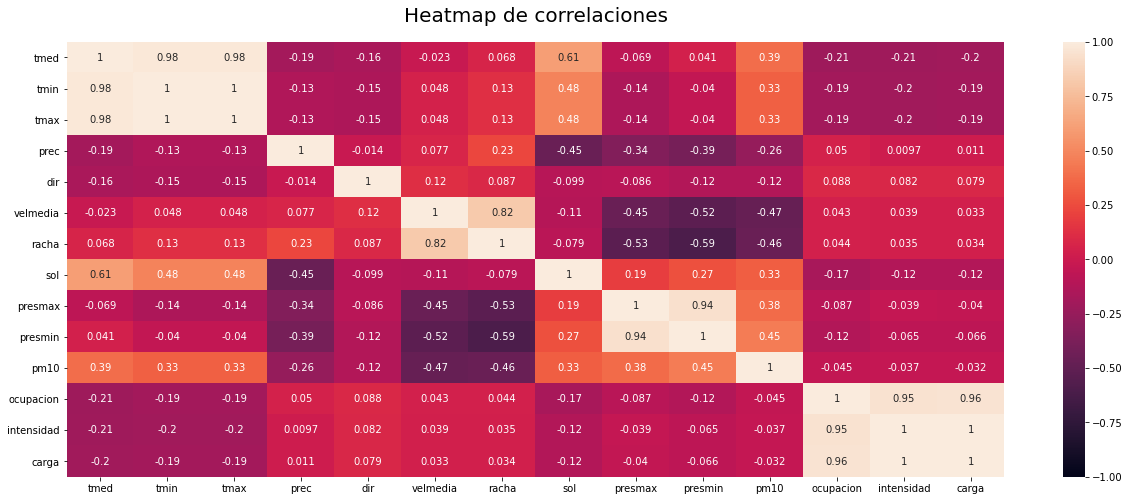

In [46]:
# Increase the size of the heatmap.
plt.figure(figsize=(21, 8))
df_mad=df_mad[['tmed','tmin','tmax','prec','dir','velmedia','racha','sol','presmax','presmin','pm10','ocupacion','intensidad','carga']]
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_mad.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Heatmap de correlaciones', fontdict={'fontsize':20}, pad=20);

### Vemos cierta correlacion positiva de particulas pm10 con las presiones maximas y minamas asi como las temperaturas. 
### el pm10 , asi como las presiones atmosfericas tambien tiene correlacion negativa con los campos de viento (velmedia y racha)
### vemos que hay correlaciones muy bajas de pm10 con la intensidad, ocupacion o carga de trafico.
### vemos que las variables de trafico estan muy correlacionadas entre ellas asi como algunas de meteo. (Presmax con pres min, racha con vel media , incluso sol con tmed guardan cierta correlacion.
### consideramos aplicar algoritmos de reduccion de variables

# añadiremos campos derivados del campo fecha para poder visualizar medidas por estacion del año y dia de la semana.

In [47]:
df_mad['season'] = (df_mad.index.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df_mad['season_name'] = df_mad['season'].map(seasons)


df_mad['year'] = df_mad.index.year
df_mad['month'] = df_mad.index.month
#df_mad['week'] = df_mad.index.isocalendar().week
df_mad['weekday'] = df_mad.index.weekday
df_mad['weekday-type'] = np.where(df_mad['weekday']>=5,'weekend','working day')
df_mad['weekday-type-bool'] = np.where(df_mad['weekday']>=5,'1','0').astype(int)
#transformo month y year a string para sacar el month-year
df_mad['month']= df_mad['month'].astype(str)
df_mad['year']= df_mad['year'].astype(str)
df_mad['month-year'] = df_mad[['month', 'year']].agg('-'.join, axis=1)
#sacamos un tail de 7 filas para ver que el weekday type salio bien
df_mad.tail(7)

tmed  tmin  tmax  prec   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2019-12-24  10.0   4.3   4.3   0.0   6.5      1.25   4.45  7.1   951.20   
2019-12-25  10.3   4.8   4.8   0.0   7.0      1.00   4.30  8.0   948.75   
2019-12-26  10.3   5.0   5.0   0.0   2.5      1.40   6.10  7.9   950.40   
2019-12-27   8.9   2.5   2.5   0.0   5.0      0.80   6.10  8.4   951.45   
2019-12-28   8.2   2.0   2.0   0.0  21.0      0.60   4.15  9.0   950.75   
2019-12-29   7.8   2.0   2.0   0.0  67.0      0.80   3.75  9.0   952.25   
2019-12-31   6.8   1.5   1.5   0.0  21.0      0.55   3.10  8.7   953.10   

            presmin  ...  intensidad  carga  season  season_name  year month  \
fecha                ...                                                       
2019-12-24   948.25  ...      145.75   12.0       1       Winter  2019    12   
2019-12-25   945.80  ...      106.00    8.0       1       Winter  2019    12   
2019-12-26   946.85  ...      244.50   19.0       1       Winter  2019    12   
2019-12-27   949.00  ...      252.00   19.0       1       Winter  2019    12   
2019-12-28   948.80  ...      168.00   12.5       1       Winter  2019    12   
2019-12-29   949.50  ...      145.25   10.5       1       Winter  2019    12   
2019-12-31   950.75  ...      174.00   13.0       1       Winter  2019    12   

           weekday weekday-type  weekday-type-bool month-year  
fecha                                                          
2019-12-24       1  working day                  0    12-2019  
2019-12-25       2  working day                  0    12-2019  
2019-12-26       3  working day                  0    12-2019  
2019-12-27       4  working day                  0    12-2019  
2019-12-28       5      weekend                  1    12-2019  
2019-12-29       6      weekend                  1    12-2019  
2019-12-31       1  working day                  0    12-2019  

[7 rows x 22 columns]

In [48]:
# Ahora que tenemos las estaciones vamos a ver las correlaciones y otros datos por estaciones del año.
# Creamos subframes por nombre de estacion
Winter=['Winter']
Spring=['Spring']
Summer=['Summer']
Autumn=['Autumn']
df_mad_subframe=df_mad[['tmed','tmin','tmax','prec','dir','velmedia','racha','sol','presmax','presmin','pm10','ocupacion','intensidad','carga','season_name']]
df_mad_Winter = df_mad_subframe[df_mad_subframe['season_name'].isin(Winter)]
df_mad_Spring = df_mad_subframe[df_mad_subframe['season_name'].isin(Spring)]
df_mad_Summer = df_mad_subframe[df_mad_subframe['season_name'].isin(Summer)]
df_mad_Autumn = df_mad_subframe[df_mad_subframe['season_name'].isin(Autumn)]

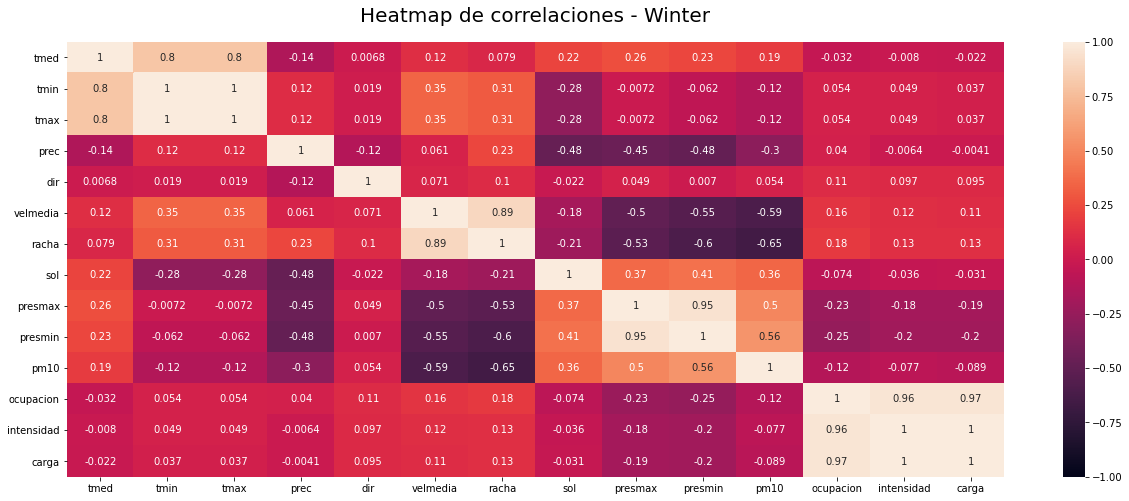

In [49]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Winter.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Winter', fontdict={'fontsize':20}, pad=20);

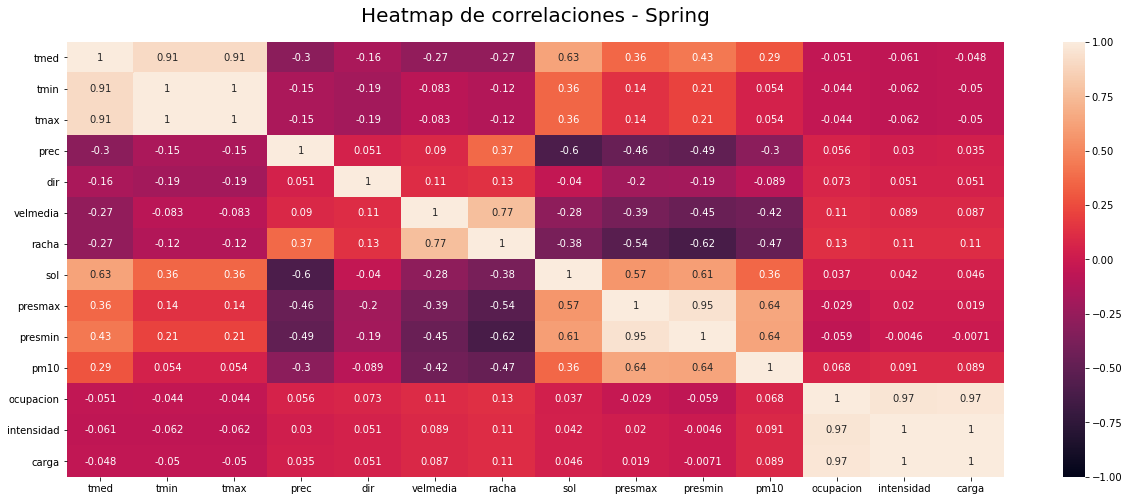

In [50]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Spring.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Spring', fontdict={'fontsize':20}, pad=20);

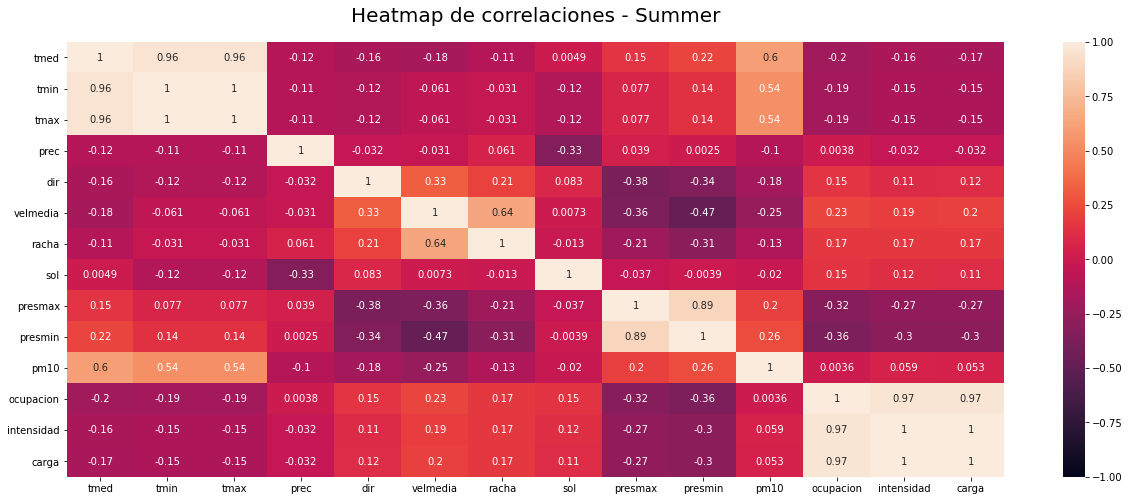

In [51]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Summer.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Summer', fontdict={'fontsize':20}, pad=20);

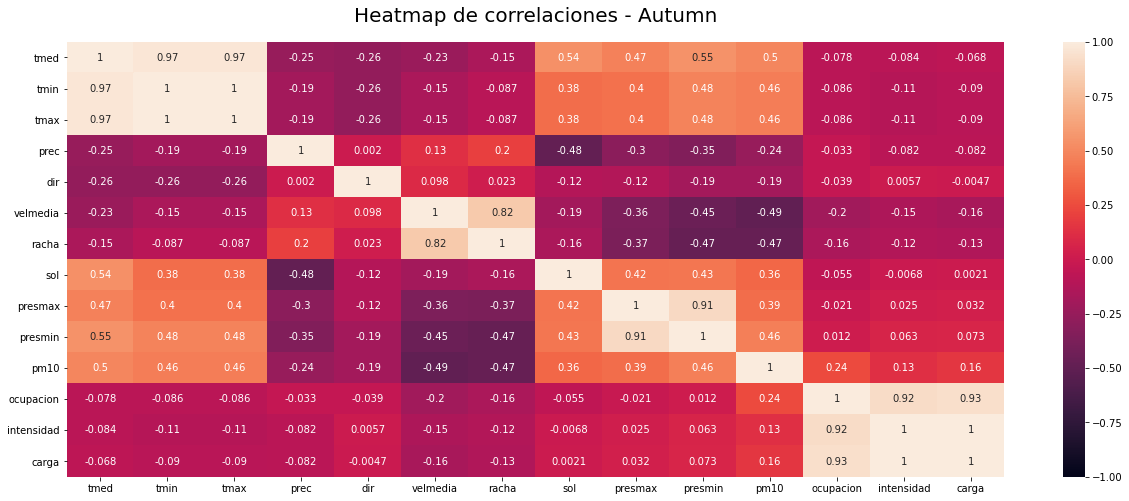

In [52]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Autumn.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Autumn', fontdict={'fontsize':20}, pad=20);

### interesante ver las correlaciones del pm10 vs presiones max y pres min por cada estacion de año
      WT. 0,5 / 0,56
      SP. 0,64 / 0,64
      SM. 0,2 / 0,2
      AT. 0,39 / 0,46
      
### interesante ver las correlaciones del pm10 vs temperatura media y minima por cada estacion de año
      WT. 0,19 / -0,12
      SP. 0,29 / 0,054
      SM. 0,6 / 0,54
      AT. 0,5 / 0,46
      
### interesante ver las correlaciones del pres max vs temperatura media por cada estacion de año. 2 años de datos son "pocas" estaciones?
      WT. 0,26 
      SP. 0,36
      SM. 0,15
      AT. 0,47   

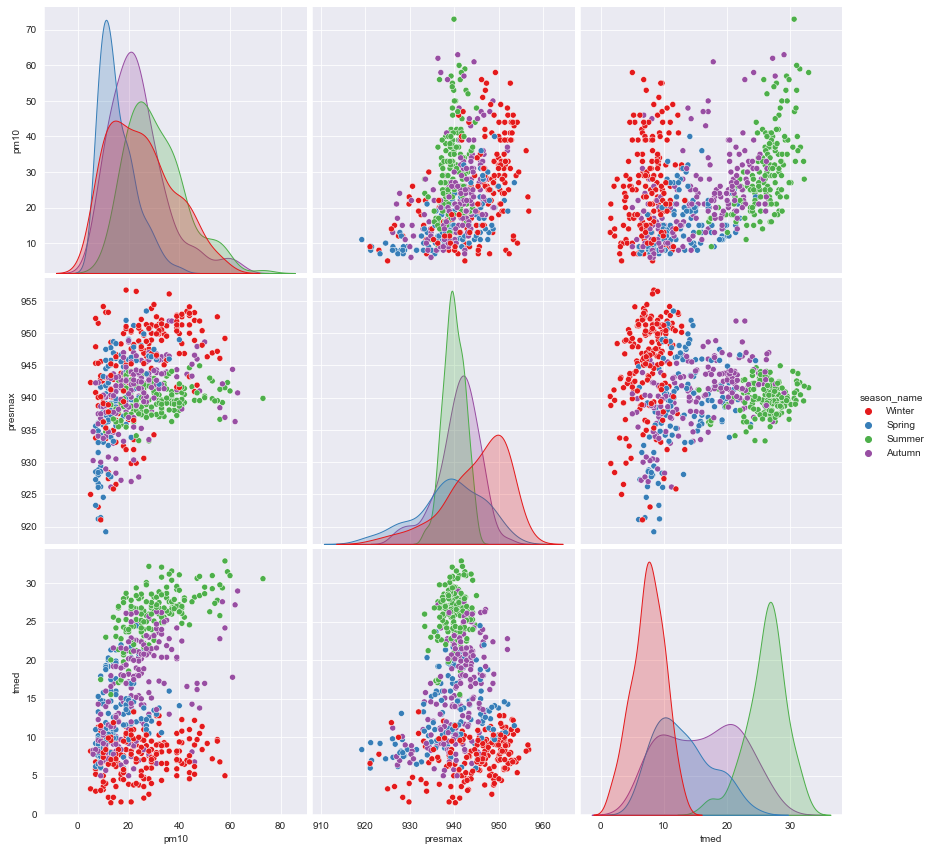

In [53]:
##visualizaremos vs estaciones del año pm10, presmax y tmed
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['pm10','presmax','tmed','season_name']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=4)

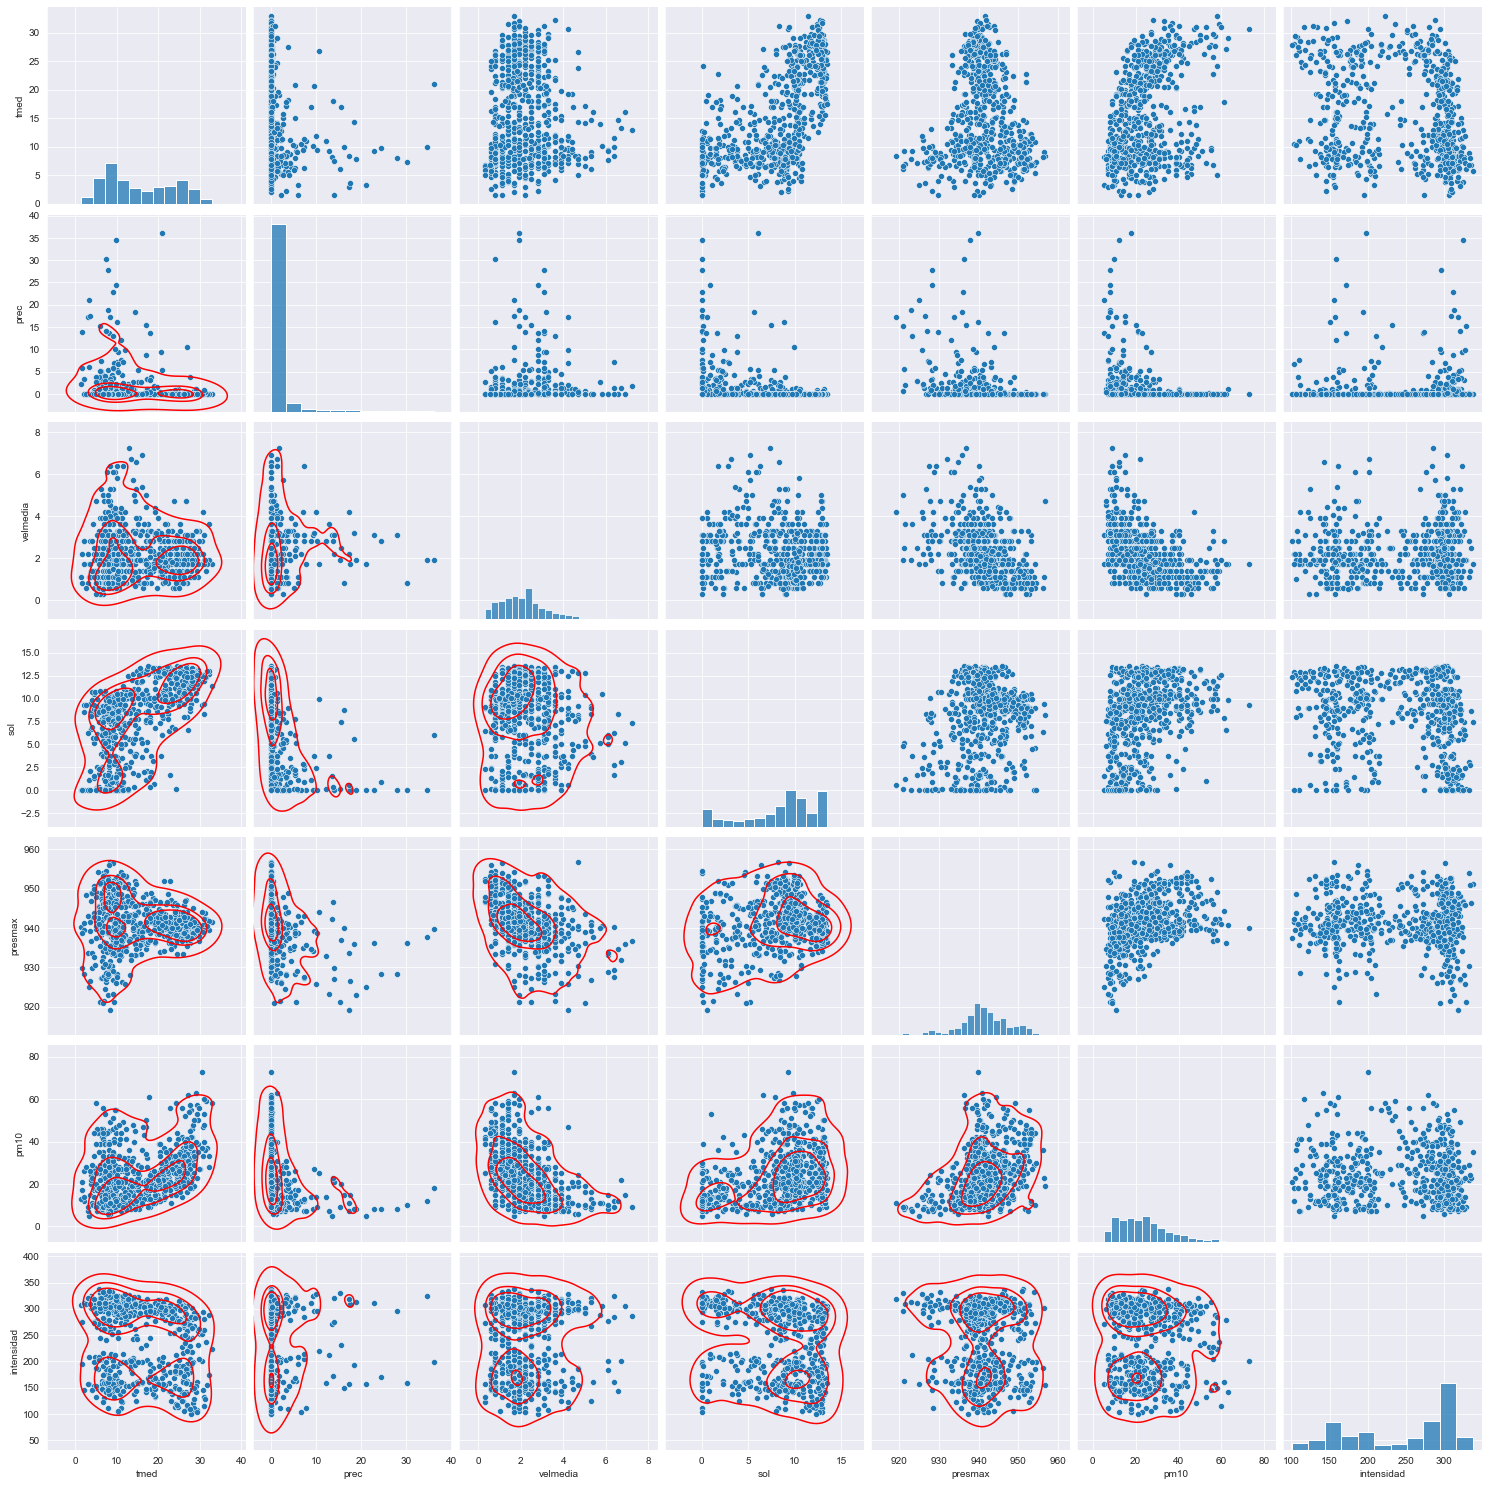

In [54]:
##visualizaremos graficos para datos de temperatura,viento,precipitacion,insolacion, presion pm10
from seaborn import pairplot
df_mad_subframe=df_mad[['tmed','prec','velmedia','sol','presmax','pm10','season_name','intensidad',]]
g = sns.pairplot(df_mad_subframe, diag_kind="hist",height=3,palette='Set1')
g.map_lower(sns.kdeplot, levels=4, color="red")

<ipython-input-55-78fc37bab603>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


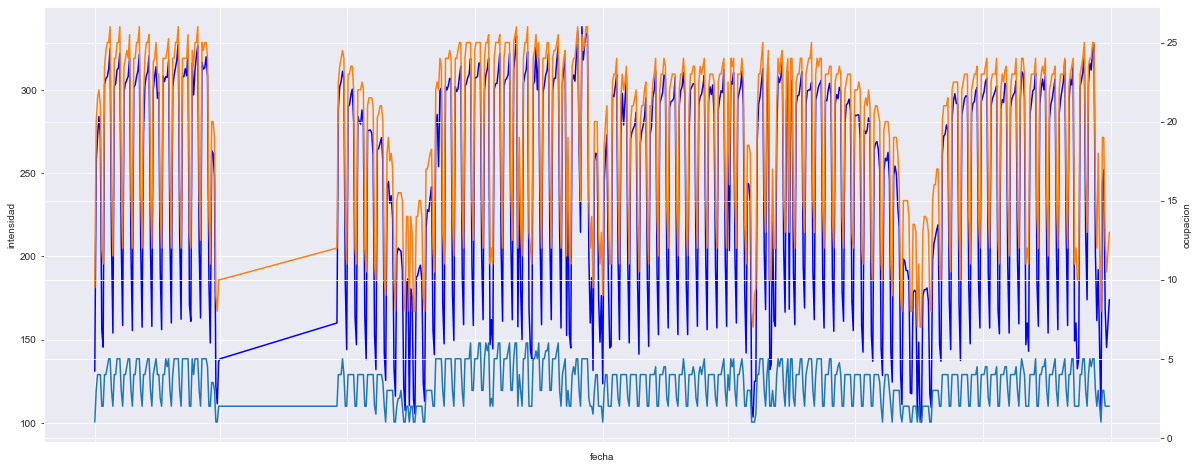

In [55]:
#vemos el trafico por fecha

ax=sns.lineplot(data=df_mad.intensidad, color="b")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.ocupacion,palette='g', ax=ax2)
sns.lineplot(data=df_mad.carga,palette='y', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('trafico.jpg', format='jpeg', dpi=70)

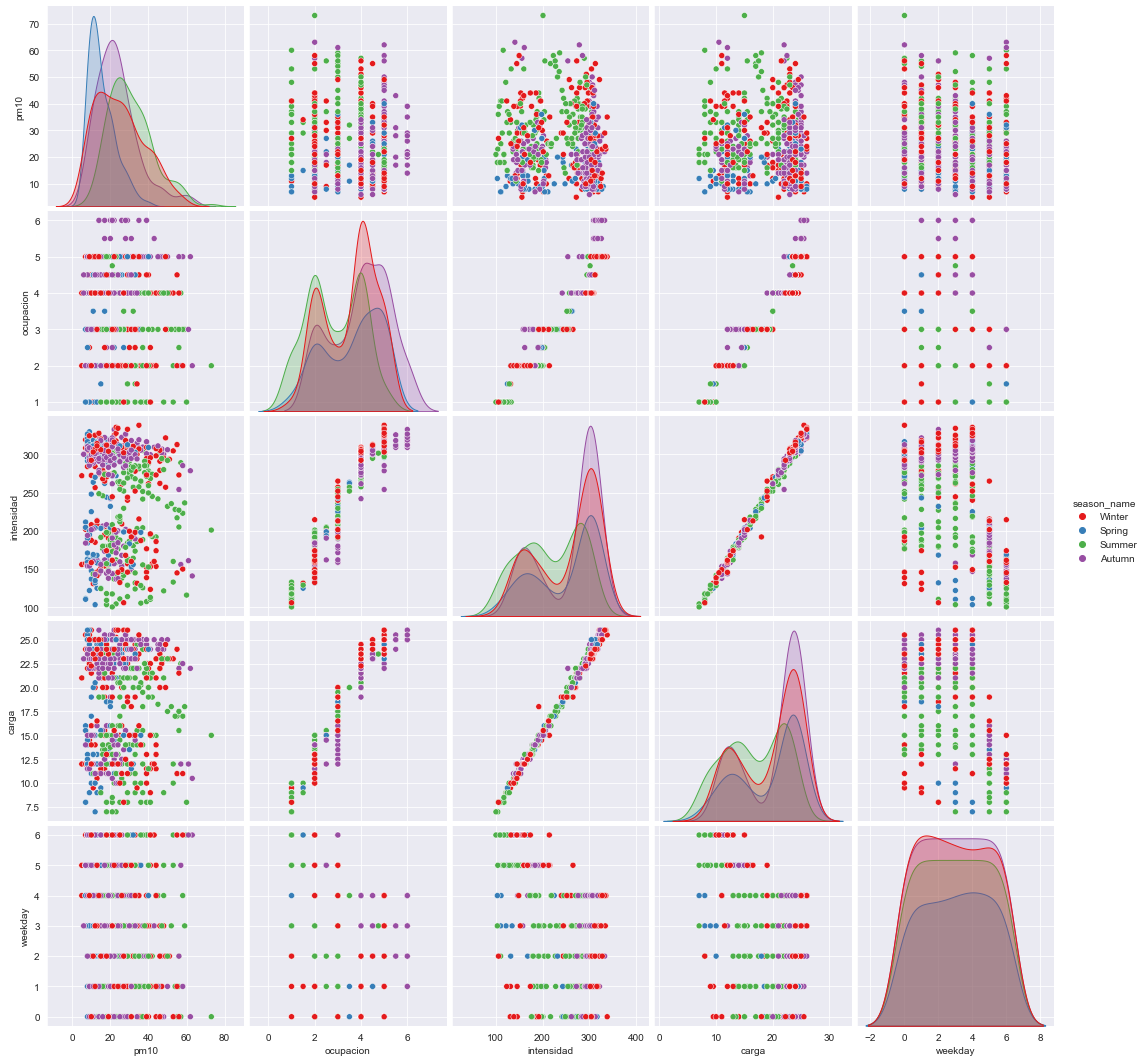

In [56]:
##visualizaremos vs estaciones del año
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['pm10','ocupacion','intensidad','carga','weekday','season_name']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=3)

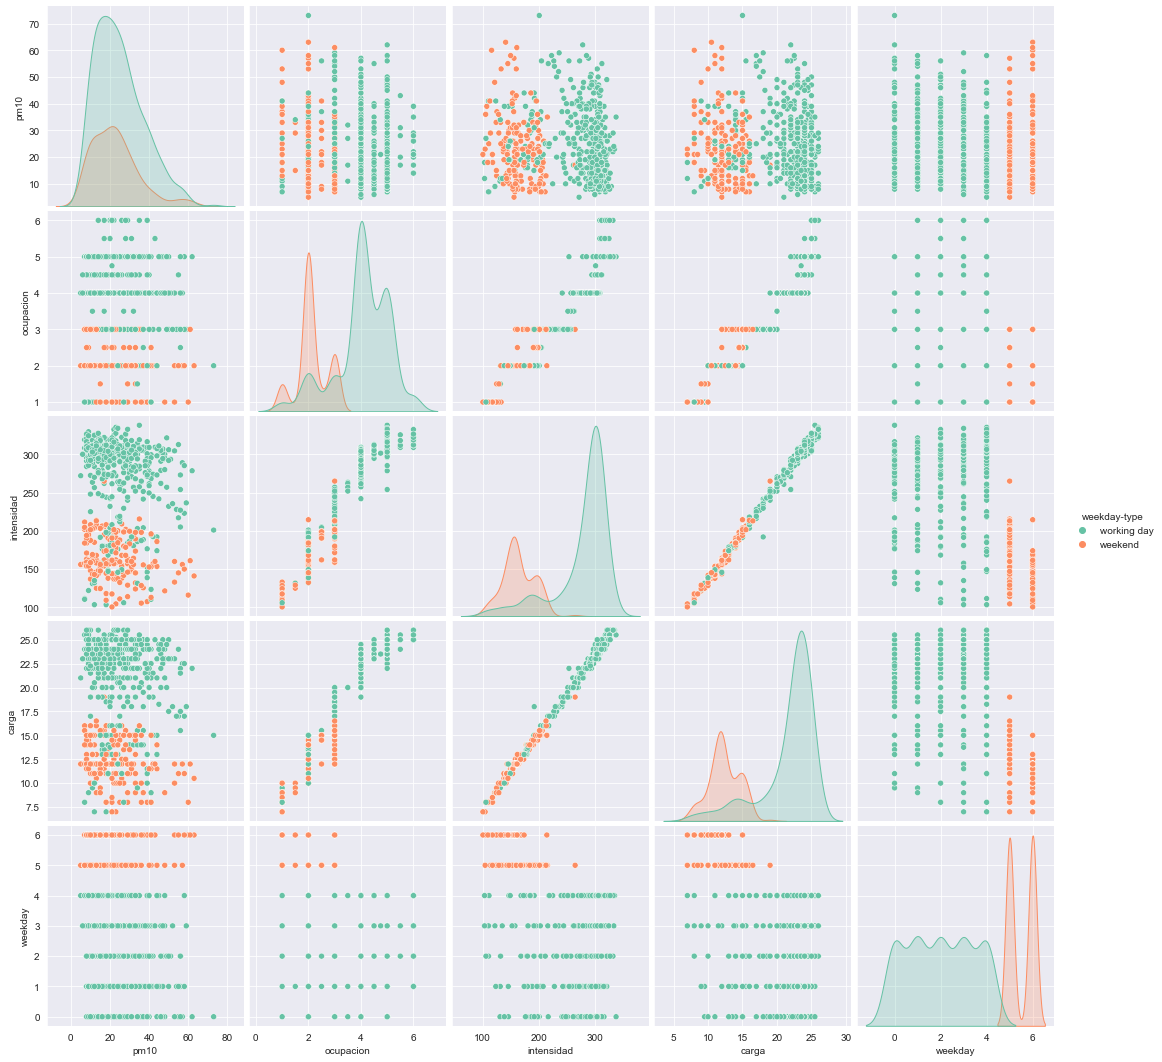

In [57]:
##visualizaremos vs tipo dia semana
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['pm10','ocupacion','intensidad','carga','weekday','weekday-type','season_name']]
sns.pairplot(df_mad_subframe,hue='weekday-type',palette='Set2',height=3)

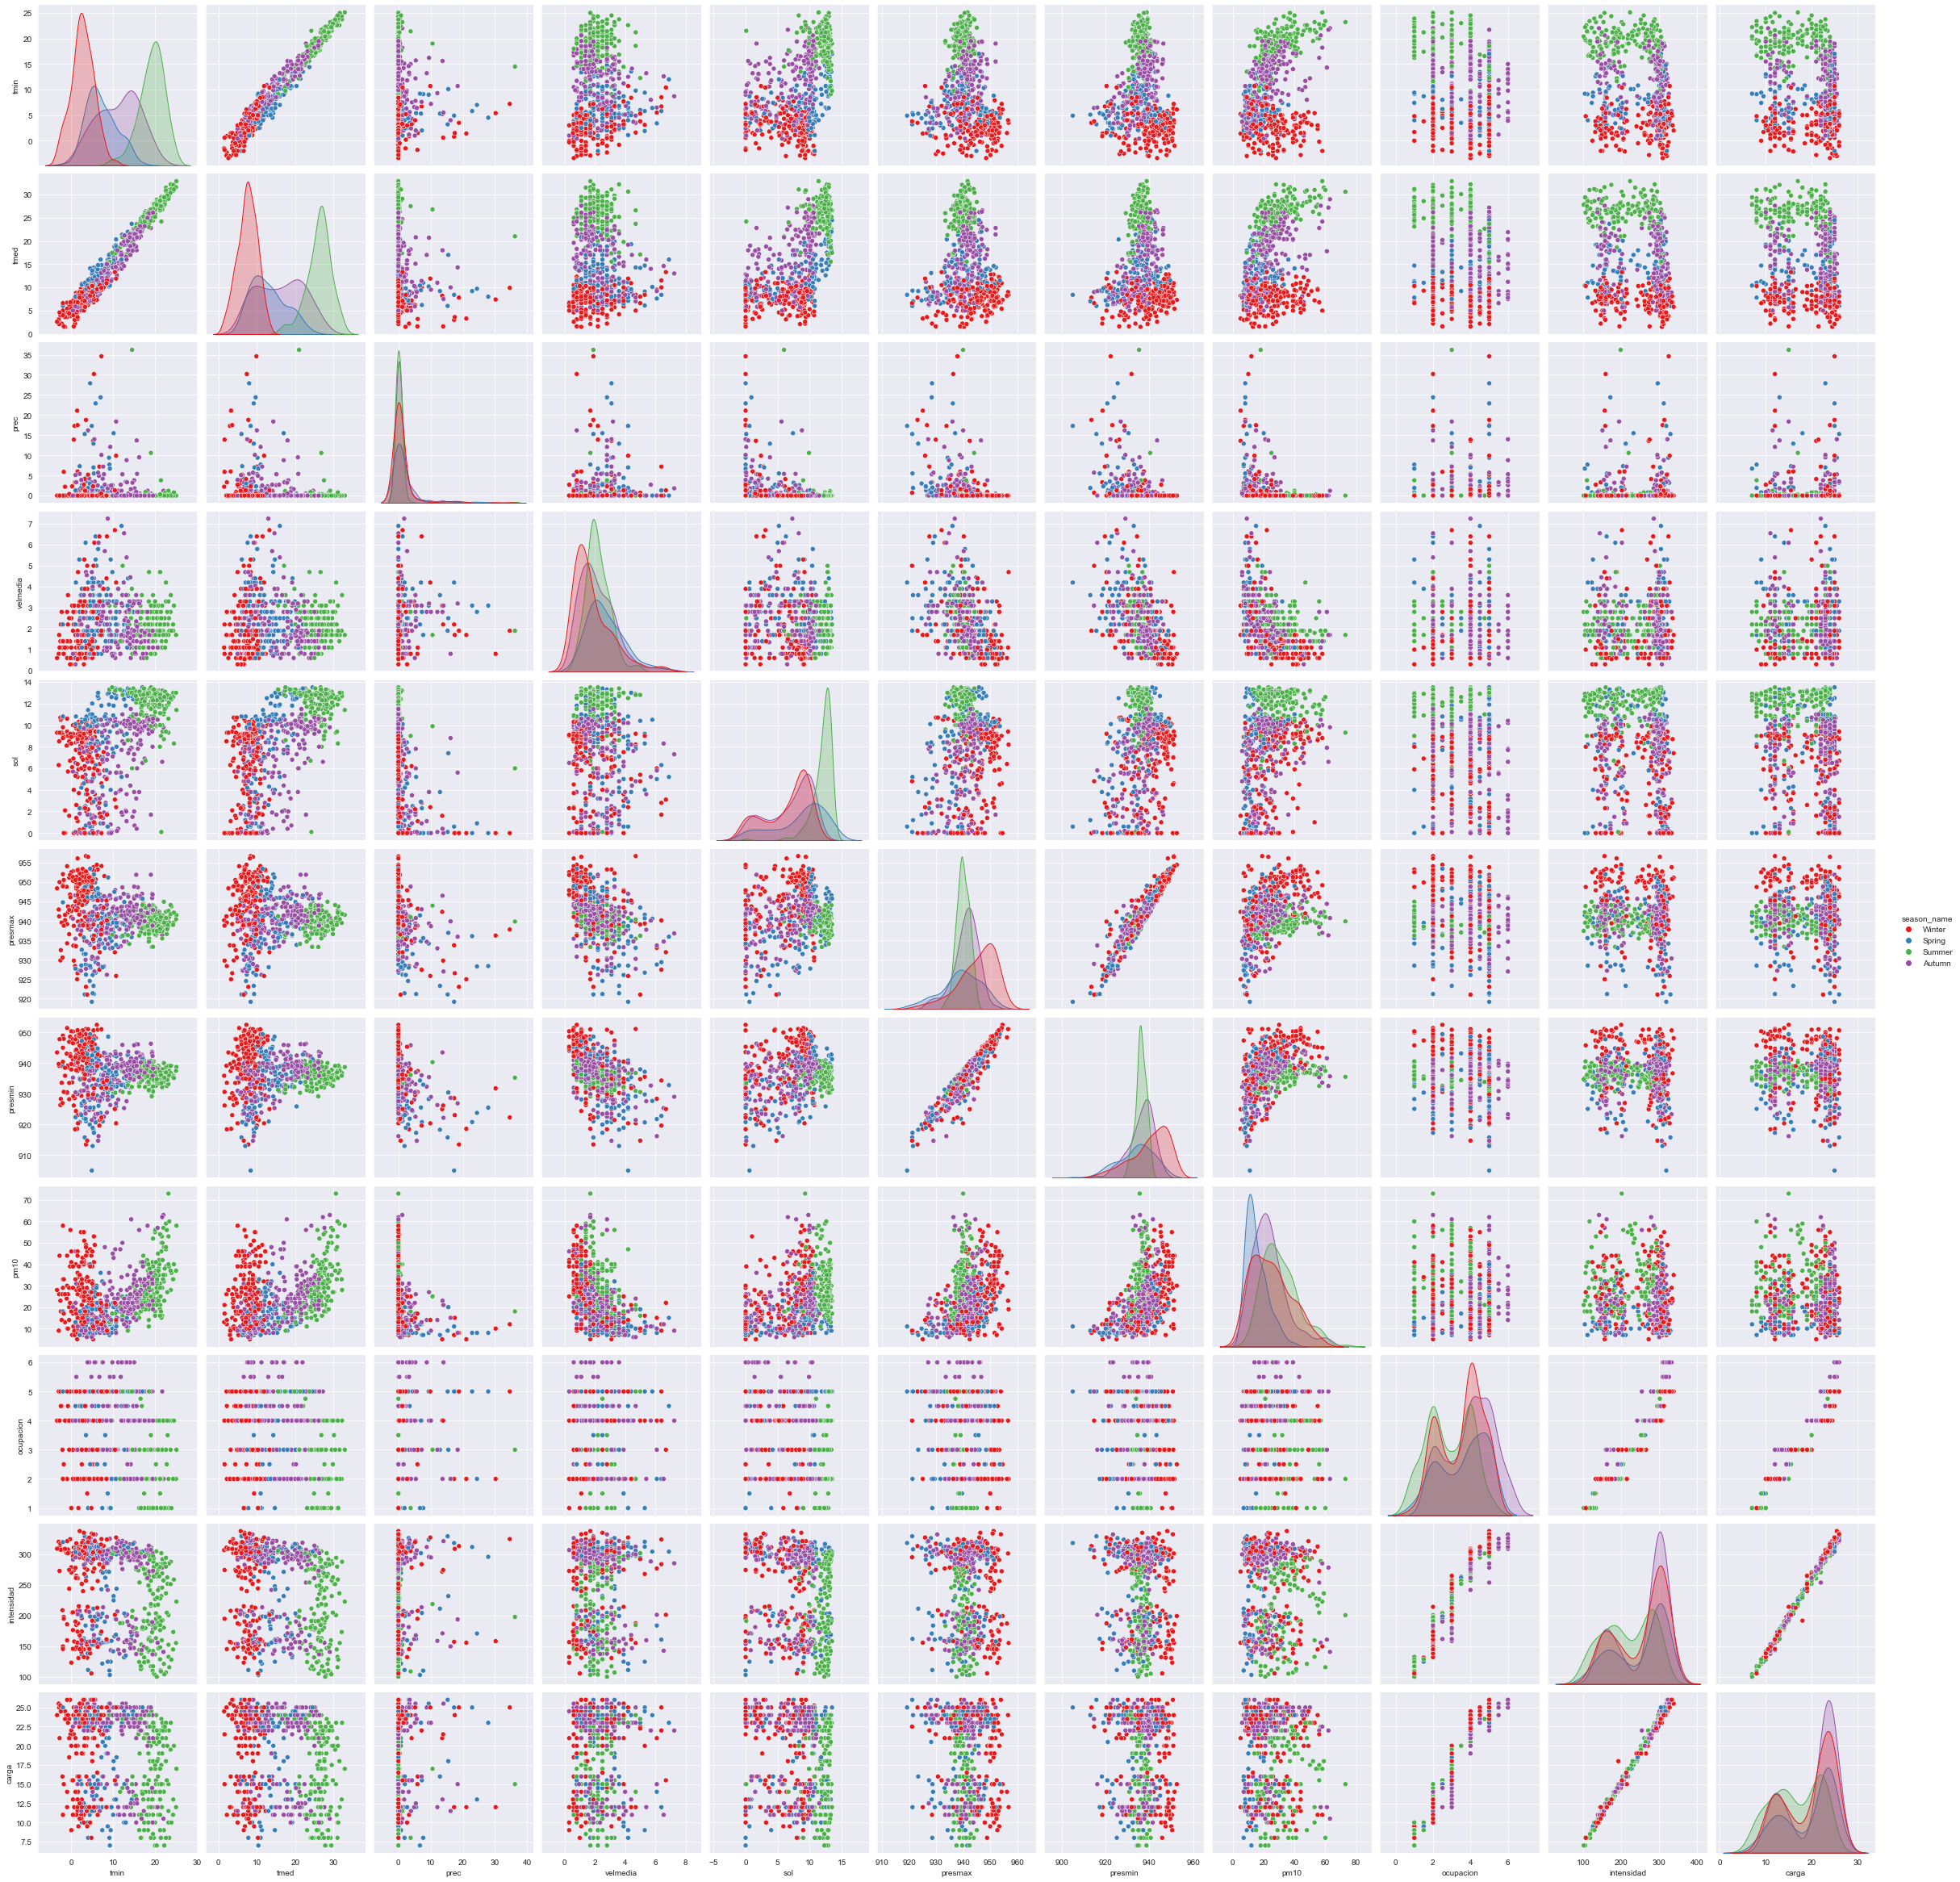

In [58]:
##visualizaremos graficos para datos de temperatura,viento,precipitacion,insolacion, presion pm10 vs estaciones del año
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['tmin','tmed','prec','velmedia','sol','presmax','presmin','pm10','season_name','ocupacion','intensidad','carga']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=3)

<ipython-input-59-b744841c08eb>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


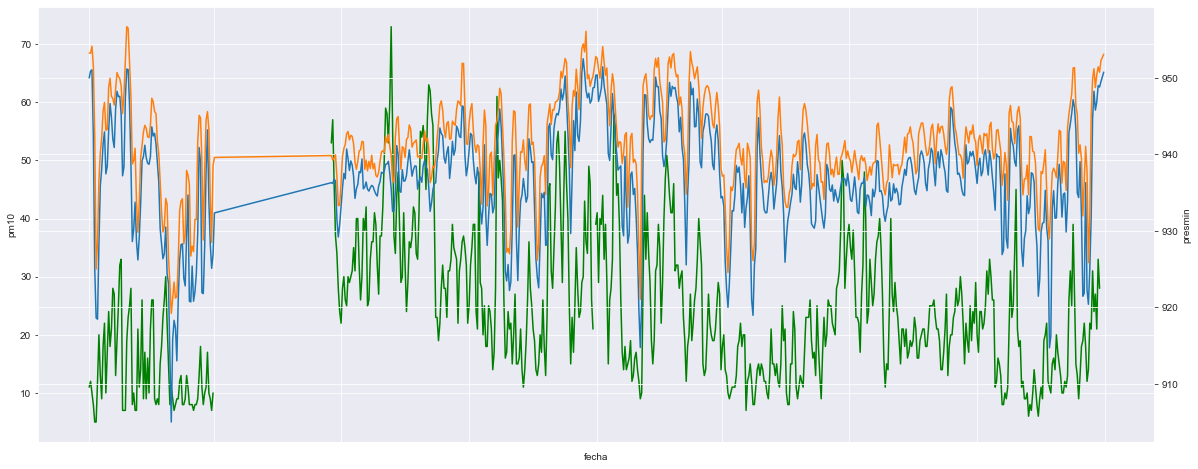

In [59]:
ax=sns.lineplot(data=df_mad.pm10, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.presmin,palette='Set1', ax=ax2)
sns.lineplot(data=df_mad.presmax,palette='Set1', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('pm10_vs_presiones.jpg', format='jpeg', dpi=70)

<ipython-input-60-e69aad55c596>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


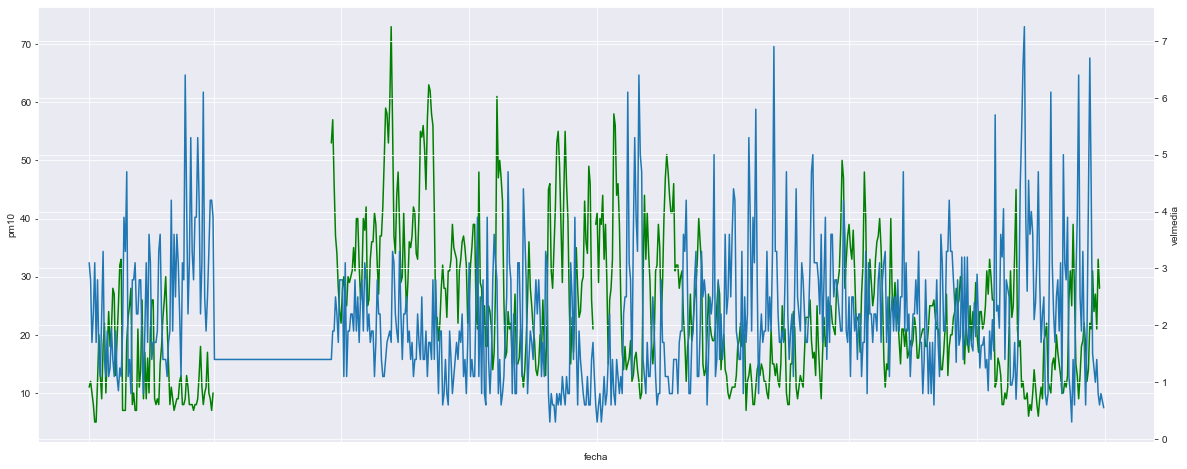

In [60]:
ax=sns.lineplot(data=df_mad.pm10, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.velmedia,palette='Set2', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('pm10_vs_viento.jpg', format='jpeg', dpi=70)

<ipython-input-61-dd089bee269c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


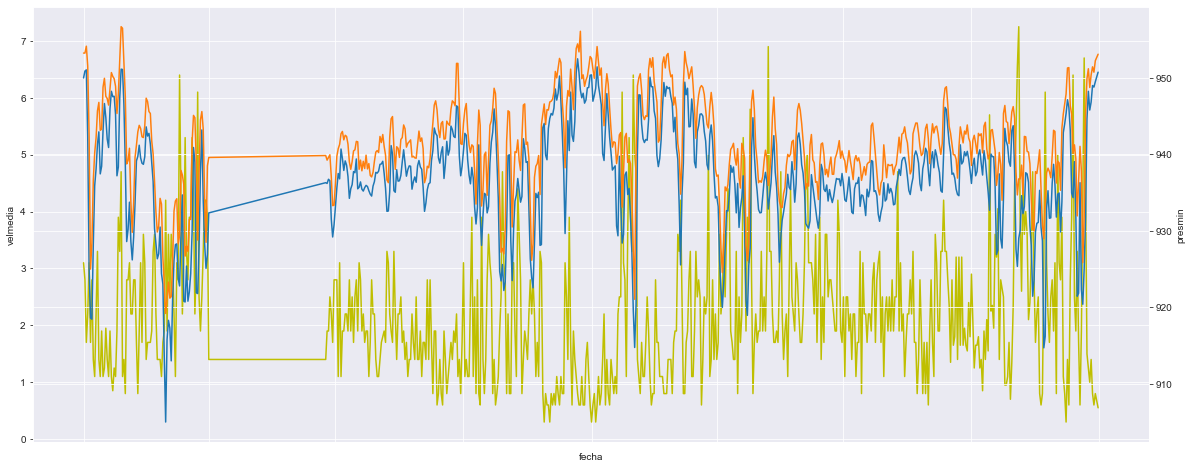

In [61]:
ax=sns.lineplot(data=df_mad.velmedia, color="y")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.presmin,palette='Set1', ax=ax2)
sns.lineplot(data=df_mad.presmax,palette='Set1', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('presion_vs_viento.jpg', format='jpeg', dpi=70)

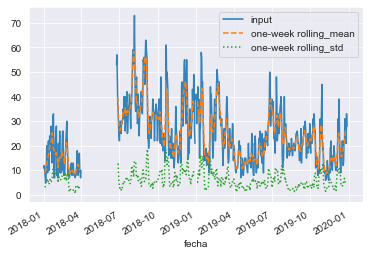

In [62]:
#ver como graficar medias moviles para presion y pm10?

rolling = df_mad['pm10'].rolling(7, center=True)

data = pd.DataFrame({'input': df_mad['pm10'],
                     'one-week rolling_mean': rolling.mean(),
                     'one-week rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.9)

## 3. Preparación de los datos
#### 3.1 Preprocesamiento: Estandarizar
    Estandarizar los datos (0 mean, 1 stdev) (Gauss, Scaler) Es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada y trabajar mejor con datos re-escalados, como regresión lineal, regresión logística y análisis de discriminación lineal.

In [63]:
# cogemos los valores numericos , tambien para estacion del año y tipo dia de la semana + fecha para el indice
df_mad_subframe=df_mad[['tmin','tmed','prec','velmedia','sol','presmax','presmin','pm10','season','ocupacion','intensidad','carga','weekday-type-bool']]
df_mad_subframe.dtypes

tmin                 float64
tmed                 float64
prec                 float64
velmedia             float64
sol                  float64
presmax              float64
presmin              float64
pm10                 float64
season                 int64
ocupacion            float64
intensidad           float64
carga                float64
weekday-type-bool      int32
dtype: object

In [64]:
# aqui todavia tengo el indice fecha
# necesito elindice fecha como campo para recuperarlo y mientas tanto volver a tener un indice numerico para mergear luego con los df "pca's" que vienen de un numpy
df_mad_subframe.head(7)

tmin  tmed  prec  velmedia  sol  presmax  presmin  pm10  season  \
fecha                                                                         
2018-01-01   1.7   6.9   0.0       3.1  5.9   953.25   950.00  11.0       1   
2018-01-02   6.3  10.4   0.0       2.8  7.0   953.25   950.90  12.0       1   
2018-01-03   7.2  10.9   0.0       1.7  4.6   954.15   951.05  10.0       1   
2018-01-04   7.9  11.3   0.0       2.2  5.8   951.55   942.35   8.0       1   
2018-01-05   5.2   8.2  13.6       3.1  1.6   942.35   925.00   5.0       1   
2018-01-06   1.4   3.3  21.1       1.7  0.0   925.00   918.60   5.0       1   
2018-01-07   0.9   2.2   3.3       2.8  0.0   928.40   918.45  12.0       1   

            ocupacion  intensidad  carga  weekday-type-bool  
fecha                                                        
2018-01-01        1.0       131.0    9.5                  0  
2018-01-02        3.0       256.5   20.0                  0  
2018-01-03        4.0       272.5   21.5                  0  
2018-01-04        4.0       284.0   22.0                  0  
2018-01-05        4.0       272.0   21.0                  0  
2018-01-06        2.0       156.0   12.0                  1  
2018-01-07        2.0       145.5   11.0                  1

In [65]:
df_mad_subframe=df_mad_subframe.reset_index()

In [66]:
df_mad_subframe.head()

fecha  tmin  tmed  prec  velmedia  sol  presmax  presmin  pm10  season  \
0 2018-01-01   1.7   6.9   0.0       3.1  5.9   953.25   950.00  11.0       1   
1 2018-01-02   6.3  10.4   0.0       2.8  7.0   953.25   950.90  12.0       1   
2 2018-01-03   7.2  10.9   0.0       1.7  4.6   954.15   951.05  10.0       1   
3 2018-01-04   7.9  11.3   0.0       2.2  5.8   951.55   942.35   8.0       1   
4 2018-01-05   5.2   8.2  13.6       3.1  1.6   942.35   925.00   5.0       1   

   ocupacion  intensidad  carga  weekday-type-bool  
0        1.0       131.0    9.5                  0  
1        3.0       256.5   20.0                  0  
2        4.0       272.5   21.5                  0  
3        4.0       284.0   22.0                  0  
4        4.0       272.0   21.0                  0

In [67]:
# Escalaremos cada grupo de datos por separado. Meteo y Tráfico.

from sklearn.preprocessing import StandardScaler
Meteo_features = ['tmin','tmed','prec','velmedia','sol','presmax','presmin']
Trafic_features = ['ocupacion','intensidad','carga']
#Seasonality_features = ['season','weekday-type-bool']


# Separamos las caracteristicas por grupo meteo y tráfico
meteo = df_mad_subframe.loc[:, Meteo_features].values
trafic=df_mad_subframe.loc[:, Trafic_features].values
#seasonality=df_mad_subframe.loc[:, Seasonality_features].values

# Separamos el valor objetivo
y = df_mad_subframe.loc[:,['pm10']].values

# Standardizing the features
meteo = StandardScaler().fit_transform(meteo)
trafic = StandardScaler().fit_transform(trafic)
#seasonality = StandardScaler().fit_transform(seasonality)

In [68]:
#vemos las la media y dv standard para cada dataframe transformado
np.mean(meteo),np.std(meteo)

(9.742072007325566e-16, 1.0)

In [69]:
np.mean(trafic),np.std(trafic)

(-1.3198936267989477e-16, 1.0)

In [70]:
#np.mean(seasonality),np.std(seasonality)

#### 3.2 PCA (Análisis de Componentes Principales) 
    Para reducir variables utilizaremos PCA, Análisis de Componentes Principales. Es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos. 

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
meteo= pca.fit_transform(meteo)
trafic= pca.fit_transform(trafic)
#seasonality= pca.fit_transform(seasonality)

PCA_meteo = pd.DataFrame(data = meteo, columns = ['meteo'])
PCA_trafic = pd.DataFrame(data = trafic, columns = ['trafic'])
#PCA_seasonality = pd.DataFrame(data = seasonality, columns = ['seasonality'])

In [72]:
df_mad_PCA = pd.merge(PCA_meteo,PCA_trafic,left_index=True, right_index=True)
#df_mad_PCA = pd.merge(df_mad_PCA,PCA_seasonality,left_index=True, right_index=True)
df_mad_PCA = pd.merge(df_mad_PCA,df_mad_subframe[['pm10','fecha']],left_index=True, right_index=True)
df_mad_PCA .set_index('fecha', inplace=True)

In [73]:
df_mad_PCA.shape

(646, 3)

In [74]:
df_mad_PCA.head()

meteo    trafic  pm10
fecha                               
2018-01-01 -0.503754  3.115288  11.0
2018-01-02 -1.104729  0.021987  12.0
2018-01-03 -1.225644 -0.725619  10.0
2018-01-04 -0.559790 -0.877503   8.0
2018-01-05  3.379452 -0.668442   5.0

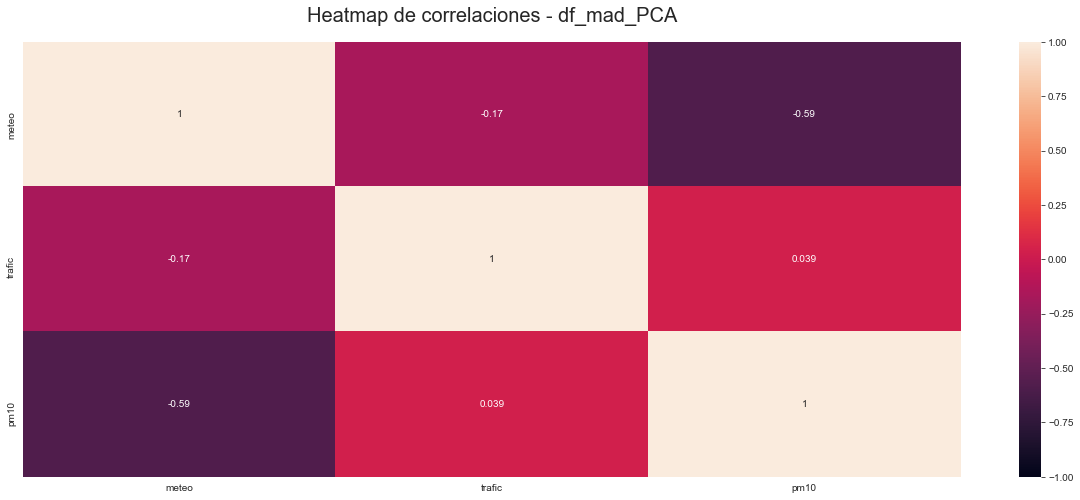

In [75]:
#vemos cada nueva variable como se correlacionan
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_PCA.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - df_mad_PCA', fontdict={'fontsize':20}, pad=20);

## PM10 vs meteo guardan correlacion negativa significativa mientras no demasiado con el trafico o la estacionalidad (ojo este estacionalidad solo es estacion del año y tipo dia semana)
## Trafico guarda cierta correlacion con seasonality

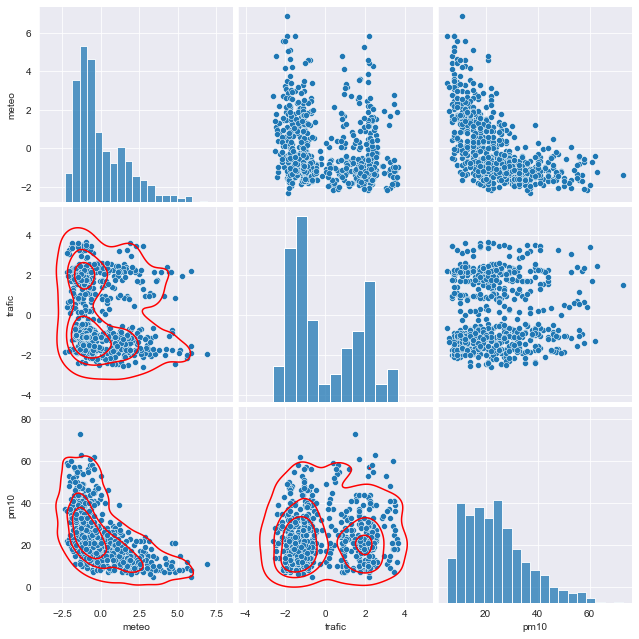

In [76]:
##visualizaremos graficos de las nuevas variables
from seaborn import pairplot
g = sns.pairplot(df_mad_PCA, diag_kind="hist",height=3,palette='Set1')
g.map_lower(sns.kdeplot, levels=4, color="red")

<ipython-input-77-c540e64df41a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


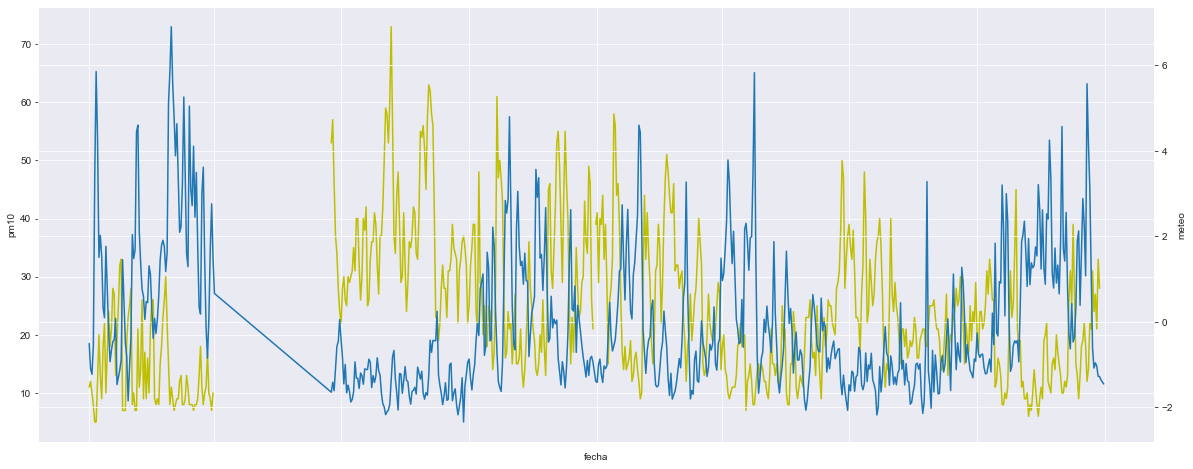

In [77]:
ax=sns.lineplot(data=df_mad_PCA.pm10, color="y")
ax2 = plt.twinx()
sns.lineplot(data=df_mad_PCA.meteo,palette='Set1', ax=ax2)
#sns.lineplot(data=df_mad_PCA.trafic,palette='Set2', ax=ax2)
#sns.lineplot(data=df_mad_PCA.seasonality,palette='Set3', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('pca_vs_pm10.jpg', format='jpeg', dpi=70)